# Analysez les ventes de votre entreprise

Scénario

Vous êtes data analyst d'une grande chaîne de librairie, fraîchement embauché depuis une semaine ! Vous avez fait connaissance avec vos collègues, votre nouveau bureau, mais surtout, la machine à café high-tech :

Mais revenons à votre mission : il est temps de mettre les mains dans le cambouis ! Le service Informatique vous a donné l’accès à la base de données des ventes. À vous de vous familiariser avec les données, et de les analyser. Votre manager souhaite que vous réalisiez une présentation pour vous "faire la main".

Comme vous l'avez appris dans vos recherches avant de postuler, votre entreprise, "Rester livres" s'est d'abord développée dans une grande ville de France, avec plusieurs magasins, jusqu'à décider d'ouvrir une boutique en ligne. Son approche de la vente de livres en ligne, basée sur des algorithmes de recommandation, lui a valu un franc succès !

-----
Analyse your company's sales

You are a data analyst for a large bookstore chain, newly hired a week ago! You have met your colleagues, your new office, but above all, the high-tech coffee machine:

But back to your assignment: it's time to get your hands dirty! The IT department has given you access to the sales database. Now it's your turn to familiarise yourself with the data and analyse it. Your manager wants you to make a presentation to "get your hands dirty".

As you learned in your research before applying, your company, "Rester livres", first developed in a large French city, with several shops, until it decided to open an online shop. Its approach to selling books online, based on recommendation algorithms, has made it a great success!

# Mission n° 1
Avant de pouvoir entrer dans le vif du sujet, il vous faudra faire un peu de nettoyage ! Par exemple, vous devrez faire des choix quant au traitement des valeurs manquantes et des valeurs aberrantes.\
Before you can get to the heart of the matter, you will have to do some cleaning up! For example, you will have to make choices about how to handle missing values and outliers.

In [1]:
# importation des bibliothèques nécessaires
# import libraries to use

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

%matplotlib inline

import datetime as dt
from itertools import cycle, islice

In [2]:
# mise en place du dossier de travail, une meilleure approche comparée à celle utilisée dans P3
# setting up working directory, a better approach compared to one used in P3

print("Old working directory is " + os.getcwd())

os.chdir(r"C:\Users\aciag\Desktop\IDF OpenClassrooms\P4_Mykhailytskyi_Mykola")

print("Current working directory is " + os.getcwd())

Old working directory is C:\Users\aciag\Desktop\IDF OpenClassrooms\jupyter_notebooks
Current working directory is C:\Users\aciag\Desktop\IDF OpenClassrooms\P4_Mykhailytskyi_Mykola


In [3]:
# lire les données des fichiers csv dans pd dfs
# read data from csv files into pd dfs

customers = pd.read_csv(r"data/customers.csv")
products = pd.read_csv(r"data/products.csv")
transactions = pd.read_csv(r"data/transactions.csv")

In [4]:
# afficher les 5 premières lignes, la forme globale, les informations générales de DF
# display first 5 rows, overall shape, general info of DF

print(customers.head())
print('\n')
print('DF shape is', customers.shape)
print('\n')
print(customers.info())

  client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943


DF shape is (8623, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
None


In [5]:
# vérification des données NaN
# check for NaN data

customers.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [6]:
# vérifier les valeurs aberrantes et la distribution
# check for outliers and distribution

print(customers['client_id'].describe())
print()
print(customers['sex'].describe())
print()
print(customers['birth'].describe())

count       8623
unique      8623
top       c_3271
freq           1
Name: client_id, dtype: object

count     8623
unique       2
top          f
freq      4491
Name: sex, dtype: object

count    8623.000000
mean     1978.280877
std        16.919535
min      1929.000000
25%      1966.000000
50%      1979.000000
75%      1992.000000
max      2004.000000
Name: birth, dtype: float64


Nous pouvons voir que le cadre de données des clients n'a pas de valeurs manquantes. Il y a plus de clients de sexe féminin que de sexe masculin. Le client le plus âgé est né en 1929, le plus jeune en 2004. Nous pourrions avoir besoin de convertir l'année de naissance en âge pour de meilleurs calculs.

We can see that customers dataframe has no missing values. There are more female customers than male ones. Oldest customer born in 1929, yongest in 2004. We might need to convert Birth Year into Age for better calculations.

In [7]:
# afficher les 5 premières lignes, la forme globale, les informations générales de DF
# display first 5 rows, overall shape, general info of DF

print(products.head())
print('\n')
print('DF shape is', products.shape)
print('\n')
print(products.info())

  id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0


DF shape is (3287, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB
None


In [8]:
# vérification des données NaN
# check for NaN data

products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [9]:
# vérifier les valeurs aberrantes et la distribution
# check for outliers and distribution

print(products['id_prod'].describe())
print()
print(products['price'].describe())
print()
print(products['categ'].describe())

count       3287
unique      3287
top       0_1114
freq           1
Name: id_prod, dtype: object

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

count    3287.000000
mean        0.370246
std         0.615387
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: categ, dtype: float64


Nous pouvons voir que le cadre de données des produits n'a pas non plus de valeurs manquantes. La description montre une anomalie dans la valeur du prix minimal, ce qui doit être examiné.

We can see that products dataframe also has no missing values. Describe shows anomaly in minimal price value, this is needs to be investigated.

In [10]:
# trouver tous les prix mal étiquetés (zéro ou moins)
# find all wrong-labelled prices (zero or below)

products[products['price'] < 0]

,id_prod,price,categ
731,T_0,-1.0,0


In [11]:
# supprimer les données de prix incorrectes, nulles ou inférieures
# remove incorrect price data, zero or below

products = products[products['price'] >= 0]

L'enquête montre qu'il n'y a qu'une seule ligne avec des données erronées.
Nous supprimons cette ligne.

Investigation shows there is only one line with erronious data.
We delete this line.

In [12]:
# afficher les 5 premières lignes, la forme globale, les informations générales de DF
# display first 5 rows, overall shape, general info of DF

print(transactions.head())
print('\n')
print('DF shape is', transactions.shape)
print('\n')
print(transactions.info())

  id_prod                        date session_id client_id
0  0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450
1   2_226  2022-02-03 01:55:53.276402   s_159142     c_277
2   1_374  2021-09-23 15:13:46.938559    s_94290    c_4270
3  0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597
4  0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242


DF shape is (337016, 4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB
None


In [13]:
# vérification des données NaN
# check for NaN data

transactions.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [14]:
# vérifier les valeurs aberrantes et la distribution
# check for outliers and distribution

print(transactions['id_prod'].describe())
print()
print(transactions['date'].describe())
print()
print(transactions['session_id'].describe())
print()
print(transactions['client_id'].describe())

count     337016
unique      3266
top        1_369
freq        1081
Name: id_prod, dtype: object

count                              337016
unique                             336855
top       test_2021-03-01 02:30:02.237413
freq                                   13
Name: date, dtype: object

count     337016
unique    169195
top          s_0
freq         200
Name: session_id, dtype: object

count     337016
unique      8602
top       c_1609
freq       12855
Name: client_id, dtype: object


Nous pouvons voir que les transactions dataframe n'ont pas non plus de valeurs manquantes. Cependant, il y a deux choses importantes ici :
- la colonne datetime contient des données "test". Cela doit être examiné.
- Le nombre unique de id_prod ne correspond pas à la base de données des produits (3266 produits dans les transactions, 3287 produits dans la base de données des produits). Cela doit être vérifié.

We can see that transactions dataframe also has no missing values. However 2 important things here are:
- datetime column contains "test" data. This needs to be investigated.
- unique count of id_prod does not match products database (3266 products in transactions, 3287 products in products database). This needs to be investigated.

In [15]:
# trouver les données de test dans la colonne date
# find test data in date col

transactions[transactions['date'].apply(lambda date: 'test' in date)]

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


In [16]:
# filtrer les lignes de test
# filter out test rows

transactions = transactions[~transactions['date'].apply(lambda date: 'test' in date)]

Filtrez toutes les données dans les transactions par la colonne date, à l'intérieur de celle-ci ne sélectionnez que les lignes contenant str test dans la colonne date.
Au total, 200 lignes de test. Nous supprimons toutes les lignes de test et sauvegardons uniquement les données du monde réel.
Ensuite, nous convertissons la colonne date d'obj en datetime afin de calculer les dates.

Filter all data in transactions by date column, inside this select only rows containing str test in column date.
Overall 200 test rows. We delete all test rows and save only real world data.
Afterwards we convert date column from obj to datetime in order to compute dates.

In [17]:
# conversion de type de données
# convert dtype of date col into datetime

transactions['date'] = pd.to_datetime(transactions['date'], infer_datetime_format=True)
transactions.sort_values(by='date', ascending=False)

,id_prod,date,session_id,client_id
79892,0_1775,2022-02-28 23:59:58.040472,s_172423,c_1460
301528,0_1403,2022-02-28 23:59:02.381670,s_172423,c_1460
6245,0_1538,2022-02-28 23:57:12.741573,s_172424,c_1876
242599,1_370,2022-02-28 23:56:57.561424,s_172423,c_1460
208601,1_456,2022-02-28 23:56:57.196281,s_172422,c_5787
...,...,...,...,...
293481,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
180767,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
216737,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
95285,0_1390,2021-03-01 00:02:26.047414,s_2,c_664


In [18]:
# make a list of unique product ids, print out total number of unique ids
# faire une liste d'identifiants uniques de produits, imprimer le nombre total d'identifiants uniques

prod_list = list(products['id_prod'].unique())
print('Products database has ' + str(products['id_prod'].nunique()) + ' unique items.')

purchased_prod_list = list(transactions['id_prod'].unique())
print('Transactions database has ' + str(transactions['id_prod'].nunique()) + ' unique items.')

Products database has 3286 unique items.
Transactions database has 3265 unique items.


In [19]:
# les articles qui ont été achetés mais qui n'existent pas dans la base de données des produits
# items that were bought but dont exist in product database

lost_item = list(set(purchased_prod_list).difference(prod_list))
print(lost_item)

['0_2245']


In [20]:
# Des articles qui n'ont jamais été achetés
# items that were never bought

never_purchased = list(set(prod_list).difference(purchased_prod_list))
print(never_purchased)

['0_1620', '2_72', '0_1780', '0_1025', '2_87', '0_510', '2_86', '0_525', '0_299', '0_1318', '0_1119', '0_1014', '0_1800', '0_1624', '1_394', '0_1645', '0_322', '1_0', '0_310', '0_1062', '0_2308', '0_1016']


In [21]:
# vérifier si ces produits existent dans nos données brutes
# check if those products exist in our raw data

print(lost_item[0] in transactions['id_prod'].values)
print(lost_item[0] in products['id_prod'].values)
print(never_purchased[0] in products['id_prod'].values)

True
False
True


In [22]:
# achats de lost_item. Filtre sur l'identifiant de l'article, fusionne le nouveau fichier avec le fichier du produit pour voir si nous avons des données sur l'article perdu.
# purchases of lost_item. Filter on item id, merge new df with product df to see if we have any data about lost_item

df1 = transactions[transactions['id_prod'].isin(lost_item)]

lost_df = pd.merge(
    df1, products,
    on='id_prod', how='left')

lost_df

,id_prod,date,session_id,client_id,price,categ
0,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,NaN,NaN
1,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,NaN,NaN
2,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,NaN,NaN
3,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,NaN,NaN
4,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,NaN,NaN
...,...,...,...,...,...,...
98,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,NaN,NaN
99,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,NaN,NaN
100,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,NaN,NaN
101,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,NaN,NaN


In [23]:
# vérifier si nous avons des données sur le prix ou la catégorie du produit perdu.
# check if we have any data about price or category for lost product

print(lost_df['price'].isna().sum())
print(lost_df['categ'].isna().sum())

103
103


Le nombre de lignes pour lost_item est égal au nombre de valeurs manquantes pour Price et Category. Cela signifie que nous n'avons pas de données sur lost_item.

Amount of rows for lost_item is equal to amount of missing values for both Price and Category. This means we have no data about lost_item

In [24]:
# Les articles qui n'ont jamais été achetés
# which items were never bought

df2 = products[(products['id_prod'].isin(never_purchased))]
df2.sort_values(by='price', ascending=False)

,id_prod,price,categ
1709,2_87,220.99,2
1946,2_72,141.32,2
2525,2_86,132.36,2
1863,1_394,39.73,1
184,0_1016,35.06,0
846,1_0,31.82,1
1543,0_1025,24.99,0
2408,0_1624,24.50,0
3031,0_510,23.66,0
2690,0_299,22.99,0


# Mission n° 2
Ensuite, vous réaliserez l’analyse des données. Une grande liberté vous est laissée sur ce plan, mais à vous de trouver les informations qui ont du sens pour mieux comprendre les ventes.

Vous devrez y utiliser au moins :

- des indicateurs de tendance centrale et de dispersion ;
- une analyse de concentration, via une courbe de Lorenz et un indice de Gini ;
- des représentations graphiques, dont au moins un histogramme, une représentation avec des "boîtes à moustaches", et une représentation de série temporelle (c’est-à-dire un graphique dont l’axe des abscisses représente des dates) ;
- des analyses bivariées.

Next, you will carry out the data analysis. You are given a lot of freedom here, but it is up to you to find the information that makes sense to understand sales better.

You should use at least :

- indicators of central tendency and dispersion ;
- concentration analysis, via a Lorenz curve and a Gini index;
- graphical representations, including at least a histogram, a "box plot", and a time series representation (i.e. a graph with dates on the x-axis);

- bivariate analyses.

In [25]:
# fusionner les données en seul DF
# merge data into single dataframe

sessions = pd.merge(
    products, transactions,
    on='id_prod', how='outer')

df_global = pd.merge(
    sessions, customers,
    on='client_id', how='outer')

# créer une nouvelle colonne 'age' pour une meilleure représentation de la variable importante
# create new col 'age' for better represantation of important variable

df_global['age'] = 2022 - df_global['birth']
customers['age'] = 2022 - customers['birth']

# supprimer lost_item des données globales car il ne contribue pas à l'analyse
# delete lost_item from global data since it wont contribute to analysis

df_global = df_global.loc[~df_global['id_prod'].isin(lost_item)]

In [26]:
# vérifier la quantité de lignes dupliquées
# check amount of duplicated rows

df_global.duplicated().sum()

0

In [27]:
# comprendre nos clients, âge moyen et âge le plus fréquent
# understanding our customers, average age and most frequent age

print('Average age of registered user is ' + str(round(customers['age'].mean(), 1)))
print('Most frequent age among registered users is ' + str(round(customers['age'].mode()[0], 1)))
print('\n')
print('Average age of our customers is ' + str(round(df_global['age'].mean(), 1)))
print('Most frequent age of our customers is ' + str(round(df_global['age'].mode()[0], 1)))

Average age of registered user is 43.7
Most frequent age among registered users is 18


Average age of our customers is 44.2
Most frequent age of our customers is 42.0


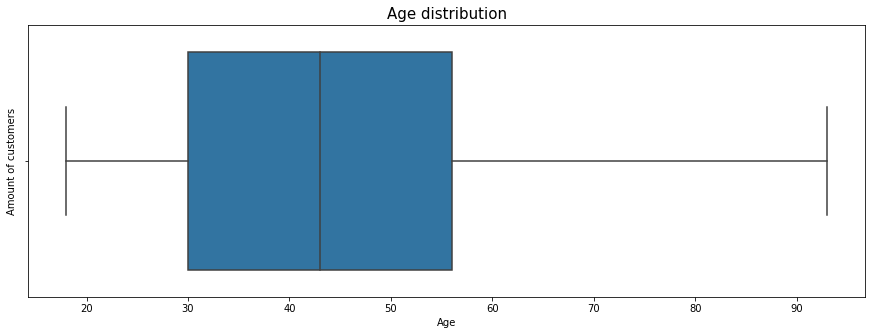

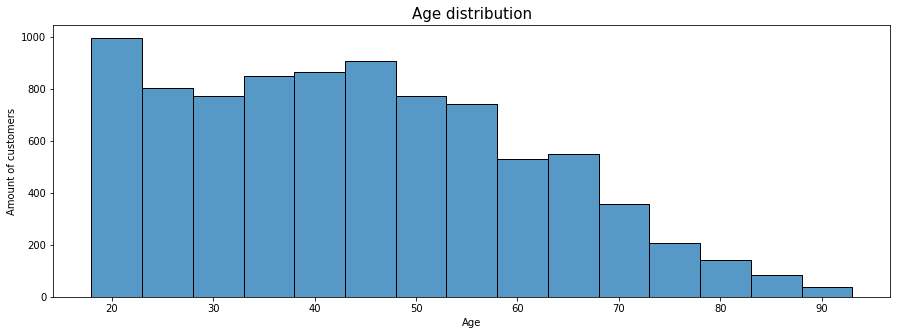

In [28]:
# visualiser les données pour voir les valeurs aberrantes et les distributions
# visualizing data to see outliers and distributions

plt.figure(figsize=(15,5))
sns.boxplot(x = customers['age'])

plt.title('Age distribution', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Amount of customers')

plt.savefig(
    fname='age_distribution_1.jpg', dpi=100,
    format='jpg', orientation='landscape',
    bbox_inches='tight')

plt.show();

plt.figure(figsize=(15,5))
sns.histplot(customers['age'], bins=15
             # each bin = 5 years, between max and min values
            )

plt.title('Age distribution', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Amount of customers')

plt.savefig(
    fname='age_distribution_2.jpg', dpi=100,
    format='jpg', orientation='landscape',
    bbox_inches='tight')

plt.show();

52.08% of our customers are female
47.92% of our customers are male


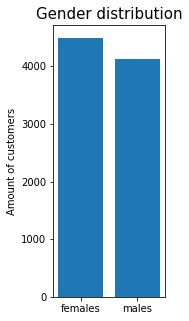

In [29]:
# gender distribution among customers
# répartition par sexe des clients

print(str(
        round(customers['sex'].value_counts()[0] * 100 / (customers['sex'].value_counts()[0] + customers['sex'].value_counts()[1]), 2)
    ) + '% of our customers are female')
print(str(
        round(customers['sex'].value_counts()[1] * 100 / (customers['sex'].value_counts()[0] + customers['sex'].value_counts()[1]), 2)
    ) + '% of our customers are male')

height = customers['sex'].value_counts()
bars = customers['sex'].unique()
y_pos = np.arange(len(bars))

plt.figure(figsize=(2,5))
plt.bar(y_pos, height)
plt.xticks(y_pos, ['females', 'males'])

plt.title('Gender distribution', fontsize=15)
plt.ylabel('Amount of customers')

plt.savefig(
    fname='gender_distribution_1.jpg', dpi=100,
    format='jpg', bbox_inches='tight')
plt.show();

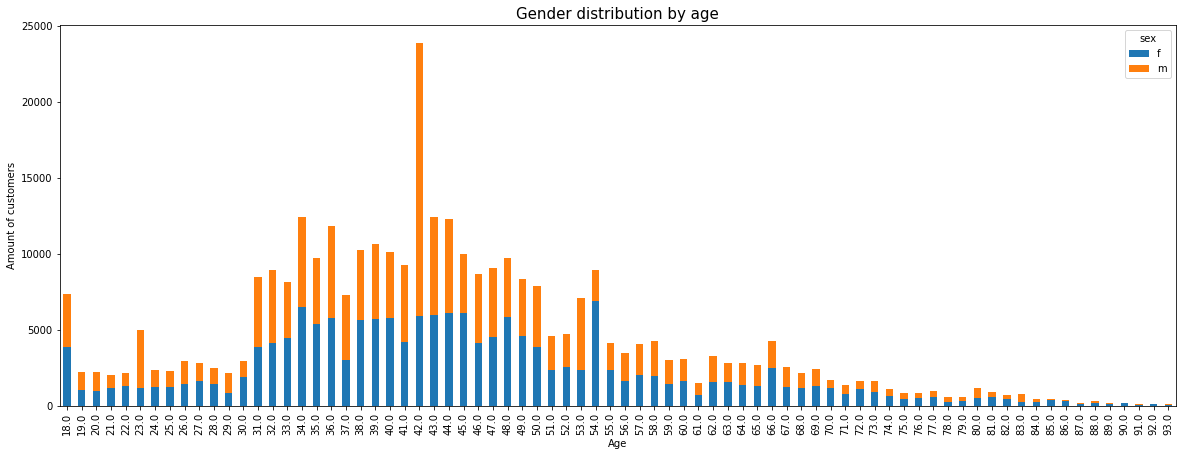

In [30]:
# gender and age distribution
# répartition par sexe et par âge

age_gender = pd.crosstab(df_global.age, df_global.sex, margins=False)

age_gender.plot(kind='bar', stacked=True, figsize=(20, 7))

plt.title('Gender distribution by age', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Amount of customers')

plt.show();

#### Conclusions 1 (l'age):
L'âge moyen de nos clients est de 44 ans. L'âge le plus populaire parmi nos clients est 42 ans (toutefois, parmi les utilisateurs enregistrés, l'âge le plus populaire est 18 ans).\
La visualisation nous montre que la majorité des clients ont entre 31 et 54 ans. Notre plus grand groupe de clients est constitué de personnes âgées de 18 à 23 ans.
La répartition par sexe est légèrement en faveur des femmes (52%), par rapport aux hommes (48%).
Si nous comparons la répartition par âge et par sexe, la tendance à l'égalité se maintient. Toutefois, quelques tranches d'âge sont dominées par un sexe spécifique (par exemple, les femmes de 54 ans, les hommes de 42 ans, les hommes de 23 ans).

Conclusions 1:\
Average age of our customers is 44. The most popular age among our customers is 42 (however among registered users most popular age is 18).\
Visualization shows us that majority of customers are between 31 and 54 years old. Our largest customer group consists of people aged 18-23.
Gender distribution slightly in favour of female customers (52%), compared to males (48%).
If we compare age and gender distribution, the equality trend keeps up. However there are a couple of ages that dominated by specific gender (for example females aged 54, males aged 42, males aged 23).

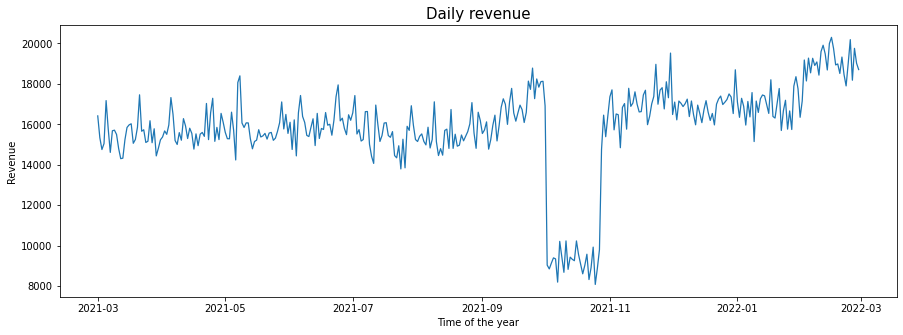

In [31]:
# représentation de série temporelle
# Time Series (no forecasting)

ts = sessions.groupby(pd.Grouper(
    key='date', axis=0, freq='D', sort=True)
                     ).sum()
ts = ts.reset_index()

# Time Series plot

plt.figure(figsize=(15,5)) 

plt.plot(
    ts['date'], ts['price'], antialiased=True,
    linestyle='-', linewidth=1.25)

plt.title('Daily revenue', fontsize=15)
plt.xlabel('Time of the year')
plt.ylabel('Revenue')

plt.savefig(
    fname='sales_history.jpg', dpi=100, format='jpg',
    orientation='landscape', bbox_inches='tight')

plt.show();

FR:
Ce graphique représente nos revenus sur l'année. Nous pouvons voir que la tendance générale est à l'augmentation. Mais il y a une nette baisse en octobre, avec une reprise immédiate en novembre. Nous devons rechercher les causes probables et voir si cela se reproduira en octobre prochain.

EN:
This graph represents our revenue over the year. We can see that overall trend is towards increasing. But there is a clear drop in October, with immediate recovery in November. We need to investigate probable causes and see if it will be repeated next October.

In [32]:
# enquêter sur une baisse de revenus en octobre
# investigating a drop of revenue in October

september_data = df_global[(df_global['date'] >= '2021-09-01') & (df_global['date'] < '2021-10-01')]

october_data = df_global[(df_global['date'] >= '2021-10-01') & (df_global['date'] < '2021-11-01')]

november_data = df_global[(df_global['date'] >= '2021-11-01') & (df_global['date'] < '2021-12-01')]

print(september_data.shape, october_data.shape, november_data.shape)

(33254, 9) (21577, 9) (28267, 9)


La quantité de données en octobre a fortement diminué par rapport au mois précédent.

Amount of data in October declined sharply compared to previous month.

In [33]:
# regrouper les ventes par nombre d'articles vendus par catégorie et par mois
# group sales by number of items sold per category per month

# .dt.isocalendar().week = weekly grouping

september_sorted = september_data.groupby([df_global['date'].dt.month, df_global.categ])[['categ']].agg(['count'])
october_sorted = october_data.groupby([df_global['date'].dt.month, df_global.categ])[['categ']].agg(['count'])
november_sorted = november_data.groupby([df_global['date'].dt.month, df_global.categ])[['categ']].agg(['count'])

In [34]:
fall_sales = pd.concat([september_sorted, october_sorted, november_sorted], axis=1)
fall_sales = fall_sales.fillna(value=0)
fall_sales

categ                  
              count    count    count
date categ                           
9.0  0.0    23112.0      0.0      0.0
     1.0     9268.0      0.0      0.0
     2.0      874.0      0.0      0.0
10.0 0.0        0.0  18751.0      0.0
     1.0        0.0   1666.0      0.0
     2.0        0.0   1160.0      0.0
11.0 0.0        0.0      0.0  14578.0
     1.0        0.0      0.0  12316.0
     2.0        0.0      0.0   1373.0

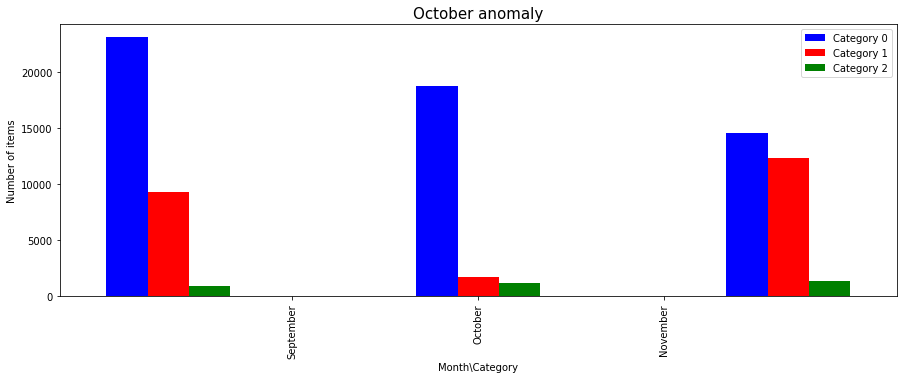

In [35]:
my_colors = list(islice(cycle(['b', 'r', 'g']), None, len(fall_sales)))

ax = fall_sales.unstack(level=1).plot(kind='bar', align='center', figsize=(15,5),
                                      legend=False, color=my_colors, stacked=False,
                                      width=2.0)

plt.xticks([0, 1, 2], ['September', 'October', 'November'])

plt.title('October anomaly', fontsize=15)
plt.legend(['Category 0', 'Category 1', 'Category 2'])
plt.xlabel('Month\Category')
plt.ylabel('Number of items')

plt.savefig(
    fname='october_anomaly_per_category.jpg', dpi=100, format='jpg',
    orientation='landscape', bbox_inches='tight')

plt.show();

In [36]:
# répartition quotidienne des ventes par catégorie
# daily breakdown of sales per category

daily_breakdown = october_data.groupby([df_global['date'].dt.day, df_global.categ])[['categ']].agg(['count'])
daily_breakdown.head(30)

categ
           count
date categ      
1.0  0.0     662
     1.0     344
     2.0      37
2.0  0.0     660
     2.0      27
3.0  0.0     647
     2.0      30
4.0  0.0     600
     2.0      37
5.0  0.0     594
     2.0      38
6.0  0.0     701
     2.0      25
7.0  0.0     597
     2.0      26
8.0  0.0     669
     2.0      44
9.0  0.0     640
     2.0      35
10.0 0.0     599
     2.0      28
11.0 0.0     642
     2.0      42
12.0 0.0     632
     2.0      29
13.0 0.0     633
     2.0      36
14.0 0.0     605
     2.0      39
15.0 0.0     632

#### Conclusions 1 (sur le mois d'octobre):
La comparaison indique que l'anomalie d'octobre pourrait être liée aux ventes d'articles de la catégorie 1. Les données montrent un certain nombre de jours où cette catégorie n'a pas été vendue du tout. Les raisons potentielles de ce phénomène sont
- corruption des données (les données sont incorrectes, la catégorie 1 a été vendue mais n'a jamais été enregistrée dans la base de données)
- anomalie des ventes (les données sont correctes, les clients n'ont pas acheté la catégorie 1 en octobre autant qu'avant ou après).

Comparison indicates that October anomaly might be connected to sales of items from Category 1. Data shows certain amount of days when this category was never sold at all. Potential reasons for this are:
- data corruption (data is incorrect, category 1 was sold but never saved in the database)
- sales anomaly (data is correct, customers were not buying category 1 in October as much as before or after)

In [37]:
# l'analyse de la tarification globale du produit
# analysing overall product pricing

print('Mean price of our products is ' + str(products['price'].mean()))
print('Median price of our products is ' + str(products['price'].median()))
print('Mode price of our products is ' + str(products['price'].mode()[0]))

Mean price of our products is 21.86359707851491
Median price of our products is 13.075
Mode price of our products is 4.99


--------------------
0
mean:
 11.732794627383015
med:
 10.32
mod:
 4.99
describe:
 count    2308.000000
mean       11.732795
std         7.565755
min         0.620000
25%         5.587500
50%        10.320000
75%        16.655000
max        40.990000
Name: price, dtype: float64
var:
 57.21584717272676
ect:
 7.5641157561691745
skw:
 0.8387209779498822
kur:
 0.3324478551097827


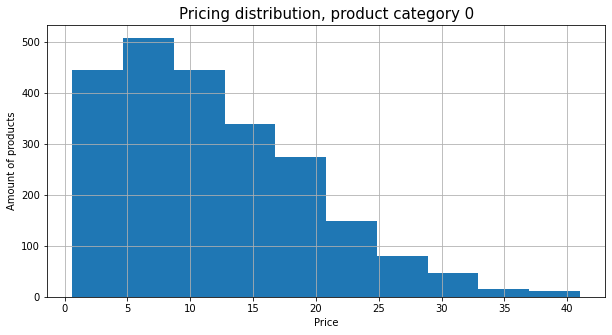

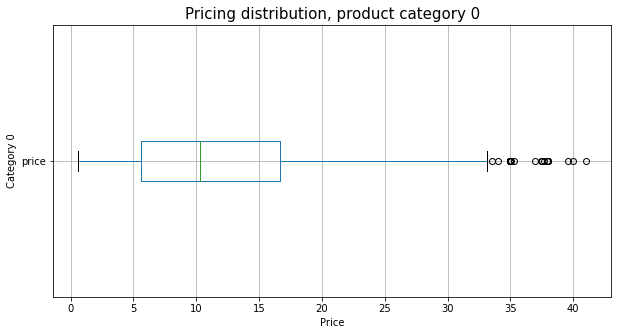

--------------------
1
mean:
 25.531420838971584
med:
 22.99
mod:
 22.99
describe:
 count    739.000000
mean      25.531421
std       15.425162
min        2.000000
25%       13.390000
50%       22.990000
75%       33.990000
max       80.990000
Name: price, dtype: float64
var:
 237.6136430421097
ect:
 15.414721633623802
skw:
 0.8120109621070365
kur:
 0.2993533794236898


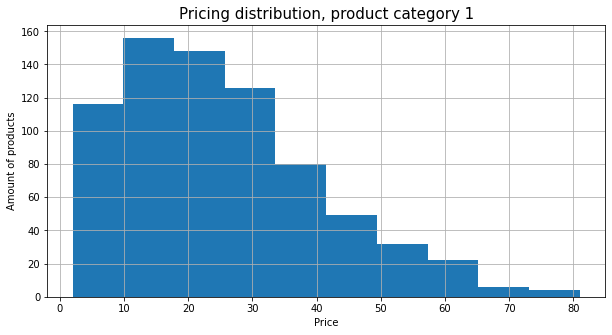

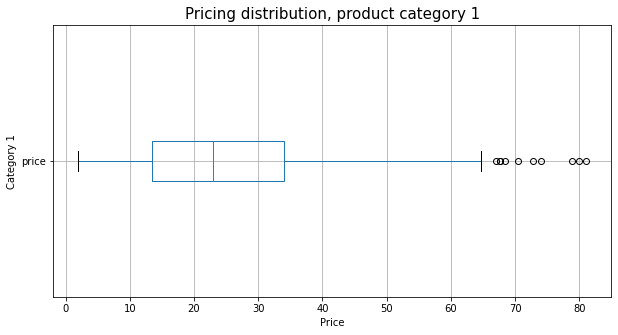

--------------------
2
mean:
 108.35468619246862
med:
 101.99
mod:
 50.99
describe:
 count    239.000000
mean     108.354686
std       49.561431
min       30.990000
25%       71.065000
50%      101.990000
75%      136.530000
max      300.000000
Name: price, dtype: float64
var:
 2446.0578977048726
ect:
 49.45763740520641
skw:
 0.9310209579538592
kur:
 0.808968484300689


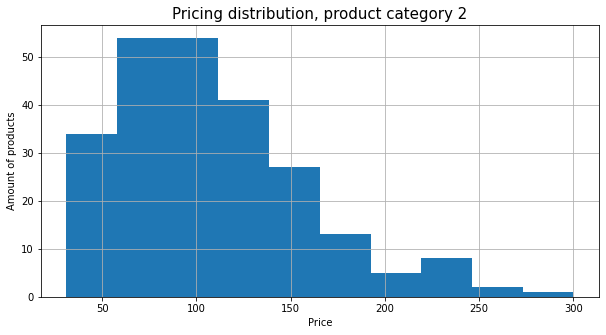

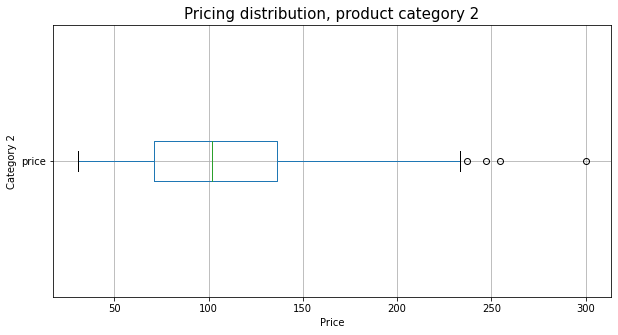

In [38]:
# analyser chaque catégorie de produits et sa tarification
# analysing each product category and its pricing

for cat in products['categ'].unique():
    subset = products[products.categ == cat] # Creation of sub-sample
    print("-"*20)
    print(cat)
    print("mean:\n",subset['price'].mean())
    print("med:\n",subset['price'].median())
    print("mod:\n",subset['price'].mode()[0])
    print("describe:\n",subset['price'].describe())
    print("var:\n",subset['price'].var(ddof=0))
    print("ect:\n",subset['price'].std(ddof=0))
    print("skw:\n",subset['price'].skew())
    print("kur:\n",subset['price'].kurtosis())
    plt.figure(figsize=(10,5)) 
    subset["price"].hist()
    plt.title(f'Pricing distribution, product category {cat}', fontsize=15)
    plt.xlabel('Price')
    plt.ylabel('Amount of products')
    plt.savefig(
        fname=f'Category_{cat}_1.jpg', dpi=100, format='jpg',
        orientation='landscape', bbox_inches='tight')
    plt.show()
    plt.figure(figsize=(10,5)) 
    subset.boxplot(column="price", vert=False)
    plt.title(f'Pricing distribution, product category {cat}', fontsize=15)
    plt.xlabel('Price')
    plt.ylabel(f'Category {cat}')
    plt.savefig(
        fname=f'Category_{cat}_2.jpg', dpi=100, format='jpg',
        orientation='landscape', bbox_inches='tight')
    plt.show()

#### Conclusions 2 (la tarification):
Le prix moyen de nos produits est de 21,9 EUR. Le prix le plus courant est de 4,99 EUR.

L'analyse de chaque catégorie de produits.\
La catégorie de produits la moins chère est "0" avec un prix moyen de 11,7 EUR. La majorité des produits de cette catégorie ont un prix compris entre 5,6 et 16,7 EUR. Le prix le plus courant est de 4,99 EUR.
La catégorie "1" est la deuxième plus abordable, avec un prix moyen de 25,5 EUR. Le prix le plus courant est de 22,99 EUR. La majorité des produits de cette catégorie ont un prix compris entre 13,4 et 33,99 EUR.
La catégorie "2" regroupe nos produits haut de gamme. Le prix moyen est de 108 EUR. Le prix le plus courant est de 50,99 EUR. La majorité des produits de cette catégorie ont un prix compris entre 71 et 137 EUR.

Conclusions about pricing:\
Average price of our products is 21.9 EUR. The most common pricing point is 4.99 EUR.

Breakdown by each product category.\
Cheapest product category is "0" with average of 11.7 EUR. Majority of the products in this category are priced between 5.6 and 16.7 EUR. Most common pricing point is 4.99 EUR.
Category "1" is second affordable, with average price of 25.5 EUR. Most common pricing point is 22.99 EUR. Majority of products in this category are priced between 13.4 and 33.99 EUR.
Category "2" is our premium products. Average price is 108 EUR. Most common pricing point is 50.99 EUR. Majority of products in this category are priced between 71 and 137 EUR.

In [39]:
# les clients qui dépensent le plus
# top 10 spending customers

csm_spending = sessions.groupby(['client_id']).sum('price')
csm_spending = csm_spending.reset_index()

csm_spending.sort_values(by='price', ascending=False).head(10)

,client_id,price,categ
677,c_1609,162007.34,2570.0
4388,c_4958,144257.21,4208.0
6337,c_6714,73197.34,1971.0
2724,c_3454,54442.92,1953.0
7715,c_7959,2564.25,38.0
3870,c_4491,2540.53,53.0
7791,c_8026,2537.67,40.0
1268,c_2140,2527.01,43.0
8195,c_8392,2515.98,41.0
7120,c_7421,2511.98,43.0


In [40]:
# save a list of clients who are clear outliers

spending_outliers = csm_spending.sort_values(by='price', ascending=False).head(4)
spending_outliers = spending_outliers['client_id'].values

Gini index is 0.4397099070275077


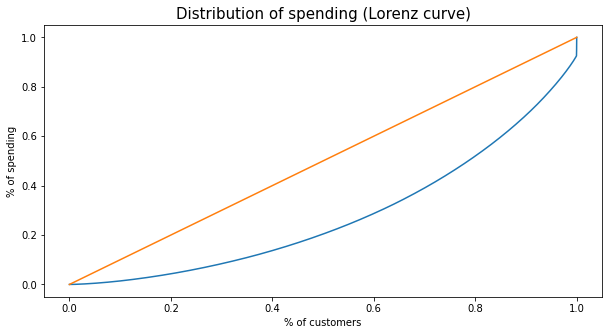

In [41]:
# Lorenz curve et Gini index

spending = pd.DataFrame(csm_spending['price'].sort_values(ascending=True))
spending = spending.to_numpy()
spending

def lorenz(x):
    scaled_prefix_sum = x.cumsum() / x.sum()
    return np.insert(scaled_prefix_sum, 0, 0)

def gini(x, w=None):
    # The rest of the code requires numpy arrays.
    x = np.asarray(x)
    if w is not None:
        w = np.asarray(w)
        sorted_indices = np.argsort(x)
        sorted_x = x[sorted_indices]
        sorted_w = w[sorted_indices]
        # Force float dtype to avoid overflows
        cumw = np.cumsum(sorted_w, dtype=float)
        cumxw = np.cumsum(sorted_x * sorted_w, dtype=float)
        return (np.sum(cumxw[1:] * cumw[:-1] - cumxw[:-1] * cumw[1:]) / 
                (cumxw[-1] * cumw[-1]))
    else:
        sorted_x = np.sort(x)
        n = len(x)
        cumx = np.cumsum(sorted_x, dtype=float)
        # The above formula, with all weights equal to 1 simplifies to:
        return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

print('Gini index is', gini(spending))

lorenz_curve = lorenz(spending)

plt.figure(figsize=(10,5))
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
plt.plot([0,1], [0,1])
plt.title('Distribution of spending (Lorenz curve)', fontsize=15)
plt.xlabel('% of customers')
plt.ylabel('% of spending')
plt.savefig(
    fname='LorenzCurve_csm_wealth.jpg', dpi=100, format='jpg',
    orientation='landscape', bbox_inches='tight')
plt.show();

#### Conclusions 3 (répartition des richesses):
Nous pouvons voir ici la liste des clients qui ont dépensé le plus au cours de cette année. Il y a clairement 4 clients qui dépensent beaucoup plus que les autres, nous devons les considérer comme des valeurs aberrantes pour l'analyse.

En utilisant l'indice de Gini et la courbe de Lorenz, nous pouvons voir la distribution des dépenses parmi nos clients. La visualisation nous montre une distribution normale (ligne bleue) qui n'est pas très éloignée de l'idéal (ligne orange). L'indice de Gini de 0,43 confirme que l'inégalité est moyenne (un indice de Gini de 0 correspond à une distribution parfaite, 1 à une inégalité maximale).

Conclusions 3 (wealth distribution):\
Here we can see the list of customers who spent the most over this year. There are clearly 4 customers who spend a lot more compared to others, we need to consider them as outliers for analysis.

Using Gini index and Lorenz curve we can see the distribution of spending among our customers. Visualization shows us a normal distribution (blue line) that is not very far from ideal (orange line). Gini index of 0.43 confirms that inequality is average (gini of 0 is perfect distribution, 1 is for maximum inequality)

# Mission n° 3
Voici quelques questions supplémentaires, que votre manager vous a posées :

1) Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ? \
2) Y a-t-il une corrélation entre l'âge des clients et : \
    - Le montant total des achats ; \
    - La fréquence d’achat (ie. nombre d'achats par mois par exemple) ; \
    - La taille du panier moyen (en nombre d’articles) ; \
    - Les catégories de produits achetés. \
    
Pour les corrélations, pas besoin d'effectuer en entier les tests (chi-2, ANOVA, etc.). Seul le calcul des statistiques de test est demandé (\(r^2, \eta^2, \xi_n\)).

Here are some additional questions, which your manager has asked you:

1) Is there a correlation between the gender of the customers and the categories of products purchased? \
2) Is there a correlation between the age of the customers and :
- Total amount of purchases ;
- Frequency of purchase (i.e. number of purchases per month for example);
- The size of the average basket (in number of items);
- The categories of products purchased. \

For correlations, there is no need to perform the full tests (chi-2, ANOVA, etc.). Only the calculation of the test statistics is required ((r^2, \eta^2, \xi_n)).

In [42]:
# afin de conserver l'objectivité de l'analyse, nous supprimons les données liées aux dépenses aberrantes de global_df
# in order to keep analysis objective we remove data connected to spending outliers from global_df

old_shape = df_global.shape[0]

df_global = df_global.loc[~df_global['client_id'].isin(spending_outliers)]

new_shape = df_global.shape[0]

print(str(
    round((( (old_shape-new_shape) / old_shape) * 100), 2))
      + "% of data rows were removed due to outliers.")

6.88% of data rows were removed due to outliers.


In [43]:
# sexe et catégorie de produit
# sex vs prod_category

gp = pd.crosstab(
    df_global.sex, df_global.categ,
    rownames=['gender'], colnames=['product_category'], margins=False)

gp

product_category,0.0,1.0,2.0
gender,,,
f,101148,53774,8122
m,94023,48851,7634


La catégorie de produit et le sexe sont tous deux des variables qualitatives. Dans ce cas, nous utilisons le Chi-2.\
Product category and gender both are qualitative variables. In this case we use Chi-2.

In [44]:
chi2, p_value, dof, expected = st.chi2_contingency(gp)

# returned values are: chi-2 test statistic | p-value | degree of freedom | expected values

In [45]:
print(chi2)
print(("%.20f" % p_value).rstrip('0').rstrip('.'))
print(dof)
print(expected)

10.202417277273174
0.00608938225335166946
2
[[101487.02774659  53364.00501352   8192.96723988]
 [ 93683.97225341  49260.99498648   7563.03276012]]


#### Conclusions sexe et catégorie de produit:
Notre valeur alpha est de 0,05 (5%). Le degré de liberté est de 2, ce qui donne une région critique de chi carré = 5.99.\
Notre chi2 est de 10.2. Il est supérieur à 5,99, il tombe donc dans la région de rejet de la courbe de distribution du chi-deux.
Tableau : https://passel2.unl.edu/view/lesson/9beaa382bf7e/8 \
Nous rejetons l'hypothèse nulle et acceptons l'hypothèse alternative.\
**Hypothèse alternative - les variables sont dépendantes les unes des autres.**

Conclusions:\
Our alpha value is 0.05 (5%). Degree of freedom is 2. This makes critical chi-square region = 5.99.\
Our chi2 is 10.2. It is bigger than 5.99, so it falls into rejection region of chi-square distribution curve.
Table: https://passel2.unl.edu/view/lesson/9beaa382bf7e/8 \
We reject Null hypothesis and accept Alternative hypothesis.\
**Alternative hypothesis - variables are dependent on each other.**

In [46]:
# âge vs montant total dépensé
# age vs total spent

spending = pd.crosstab(
    df_global.birth, df_global.price.sum(),
    rownames=['DOB'], colnames=['spending']).reset_index()

spending['DOB'] = 2021 - spending['DOB']

spending = spending.rename(
    columns={'DOB':'age', spending.columns[1]:'total_spent'})

spending.index.name = None
spending.columns.name = None

spending

,age,total_spent
0,92.0,86
1,91.0,115
2,90.0,84
3,89.0,159
4,88.0,163
...,...,...
71,21.0,2174
72,20.0,2036
73,19.0,2224
74,18.0,2183


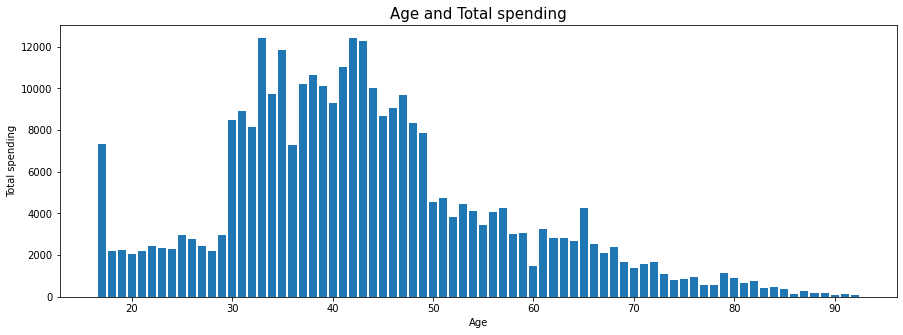

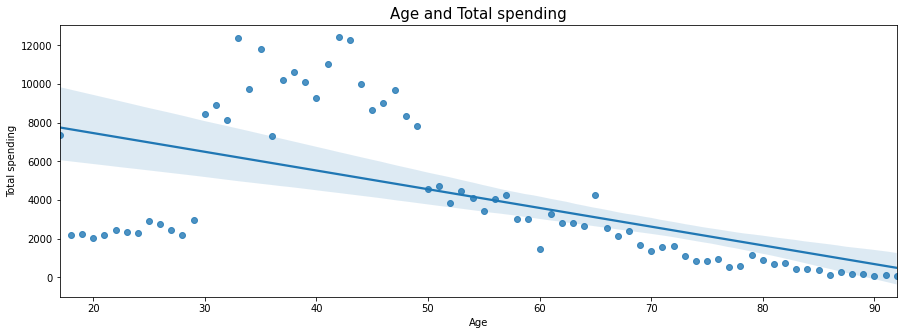

In [47]:
# visualisation des données
# visualizing data

plt.figure(figsize=(15,5))
plt.bar(spending['age'], spending['total_spent'])

plt.title('Age and Total spending', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Total spending')

plt.savefig(
    fname='age_vs_totalspending_distribution_1.jpg', dpi=100, format='jpg',
    orientation='landscape', bbox_inches='tight')
plt.show();

plt.figure(figsize=(15,5))
sns.regplot(x=spending['age'], y=spending['total_spent'])

plt.title('Age and Total spending', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Total spending')

plt.savefig(
    fname='age_vs_totalspending_distribution_2.jpg', dpi=100, format='jpg',
    orientation='landscape', bbox_inches='tight')
plt.show();

Both variables are quantitative. We will use Pearson correlation.

In [48]:
# r value, Pearson linear correlation. OC course method 

print('Coefficient of linear correlation is' + '(' + 'r value' + ')' + ': ' + str(st.pearsonr(spending['age'], spending['total_spent'])[0]))
print('R squared is: ' + str(st.pearsonr(spending['age'], spending['total_spent'])[0]**2))
print('p-value is: ' + str(st.pearsonr(spending['age'], spending['total_spent'])[1]))

Coefficient of linear correlation is(r value): -0.5705117237188833
R squared is: 0.3254836269006914
p-value is: 7.433104584149938e-08


In [49]:
# r value, Pearson linear correlation. Using scipy.stats

data2 = [spending.age.values, spending.total_spent.values]

slope, intercept, r_value, p_value, std_err = st.linregress(data2)
print('r squared value is: ' + str(r_value**2))
print('r value is: ' + str(r_value))

r squared value is: 0.32548362690069127
r value is: -0.5705117237188831


#### Conclusions âge vs montant total dépensé:
La valeur r de -0.57 indique l'existence **d'une corrélation négative moyenne**. Lorsque l'âge augmente, le total_dépenses diminue et vice versa.

La visualisation nous montre la distribution des dépenses dans chaque groupe d'âge. Les personnes âgées de 41 ans sont celles qui dépensent le plus.
Une autre visualisation avec la ligne de régression confirme la valeur r (corrélation négative moyenne), et nous montre qu'il y a plus de variance chez les jeunes clients et beaucoup moins chez les plus âgés.

Conclusions:\
r value of -0.57 indicates existance of **medium negative correlation**. When age increases, total_spent decreases and vice versa.

Visualization shows us distribution of spending in each age group. People aged 41 spend the most.
Another visualization with regression line confirms r value (medium negative correlation), plus shows us there is more variance in younger customers and much less in older ones.

In [50]:
# âge et fréquence des achats
# age vs frequency of purchase

purchase_freq = pd.crosstab(df_global['birth'], df_global.date.dt.year)

# new col indicating age
purchase_freq['age'] = 2021 - purchase_freq.index.values

# remove index name and columns name
purchase_freq.columns.name = None
purchase_freq.index.name = None

purchase_freq = purchase_freq.reset_index(drop=True)

# create new col with total amount of purchases divided by 12 months.
# Data present from March 1st 2021 till March 1st 2022.
purchase_freq['purchase_frequency'] = (purchase_freq[2021] + purchase_freq[2022]) / 12

purchase_freq.drop(columns=[2021, 2022], inplace=True)

purchase_freq.sample(3)

,age,purchase_frequency
19,73.0,91.583333
55,37.0,852.666667
40,52.0,320.500000


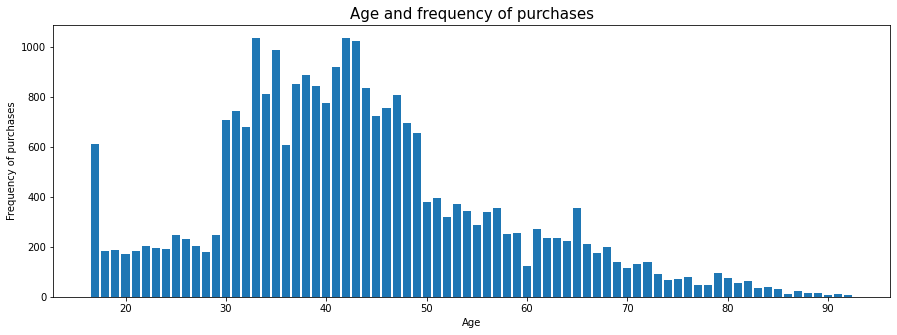

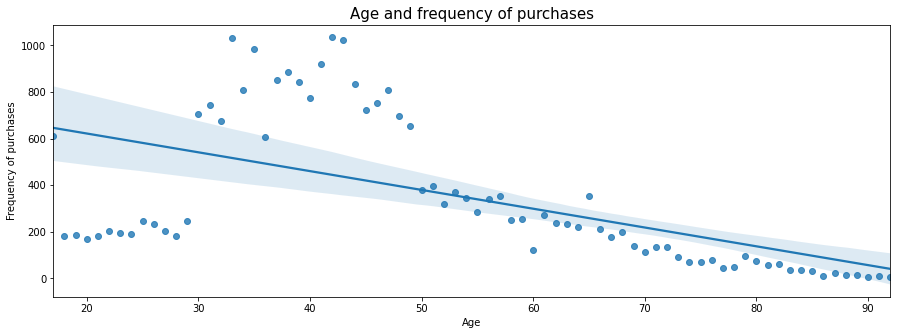

In [51]:
# visualisation des données
# visualizing data

plt.figure(figsize=(15,5))
plt.bar(purchase_freq['age'], purchase_freq['purchase_frequency'])

plt.title('Age and frequency of purchases', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Frequency of purchases')

plt.savefig(
    fname='age_vs_freqpurchase_1.jpg', dpi=100, format='jpg',
    orientation='landscape', bbox_inches='tight')
plt.show();

plt.figure(figsize=(15,5))
sns.regplot(x=purchase_freq['age'], y=purchase_freq['purchase_frequency'])

plt.title('Age and frequency of purchases', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Frequency of purchases')

plt.savefig(
    fname='age_vs_freqpurchase_2.jpg', dpi=100, format='jpg',
    orientation='landscape', bbox_inches='tight')
plt.show();

Both variables are quantitative, using Pearson correlation.

In [52]:
# r value, Pearson linear correlation. OC course method 

print('Coefficient of linear correlation is: ' + str(st.pearsonr(purchase_freq['age'], purchase_freq['purchase_frequency'])[0]))
print('R squared is: ' + str(st.pearsonr(purchase_freq['age'], purchase_freq['purchase_frequency'])[0]**2))
print('p-value is: ' + str(st.pearsonr(purchase_freq['age'], purchase_freq['purchase_frequency'])[1]))

Coefficient of linear correlation is: -0.5704319883233265
R squared is: 0.3253926533025037
p-value is: 7.471257216702838e-08


In [53]:
# r value, Pearson linear correlation. Using scipy.stats

data3 = [purchase_freq.age.values, purchase_freq.purchase_frequency.values]

slope, intercept, r_value, p_value, std_err = st.linregress(data3)
print('r squared value is: ' + str(r_value**2))
print('r value is: ' + str(r_value))

r squared value is: 0.325392653302504
r value is: -0.5704319883233268


#### Conclusions âge et fréquence des achats:
Le coefficient de corrélation de Pearsons de -0.57 montre une **corrélation négative moyenne**. Plus l'âge augmente, plus la fréquence des achats diminue et vice versa.
La visualisation nous montre la distribution des dépenses dans chaque groupe d'âge. Les personnes âgées de 41 ans sont celles qui achètent le plus de produits.
Une autre visualisation avec la ligne de régression confirme la valeur r (corrélation négative moyenne), et nous montre qu'il y a plus de variance chez les jeunes clients et beaucoup moins chez les plus âgés.
En outre, nous pouvons voir 3 groupes distincts de clients en fonction de leur fréquence d'achat. Les 18-29 ans, les 30-53 ans et les 54-95 ans achètent des produits à des fréquences différentes.

Conclusions:\
Pearsons correlation coefficient of -0.57 shows **medium negative correlation**. As age increases, frequency of purchases decreases and vice versa.
Visualization shows us distribution of spending in each age group. People aged 41 buy the most amount of products.
Another visualization with regression line confirms r value (medium negative correlation), plus shows us there is more variance in younger customers and much less in older ones.
Additionally, we can see 3 distinct clusters of customers by their purchase frequency. Ages 18-29, 30-53 and 54-95 buy products with different frequency.

In [54]:
# âge vs panier moyen (nombre d'articles)
# age vs size of average basket (number of items)

basket = df_global[['birth', 'session_id','id_prod']].groupby(['birth','session_id']).count().reset_index()
basket = basket.groupby(['birth']).mean().reset_index()
basket['age'] = 2021 - basket['birth']
basket.rename(columns={'id_prod':'avg_basket_size'}, inplace=True)
basket.drop(['birth'], axis=1, inplace=True)
basket

,avg_basket_size,age
0,1.343750,92.0
1,1.597222,91.0
2,1.714286,90.0
3,1.543689,89.0
4,1.393162,88.0
...,...,...
71,1.842373,21.0
72,1.732310,20.0
73,1.742163,19.0
74,1.724901,18.0


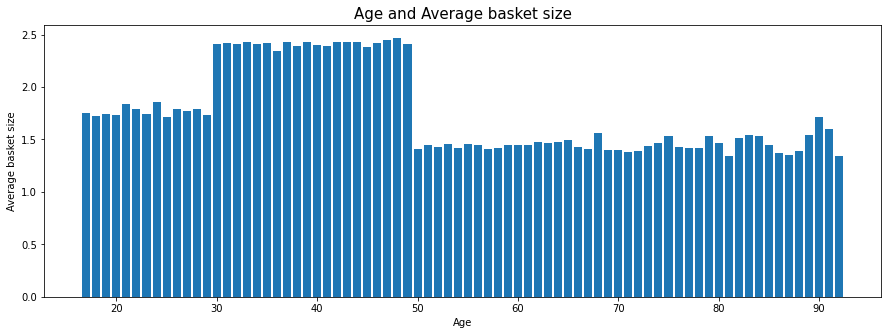

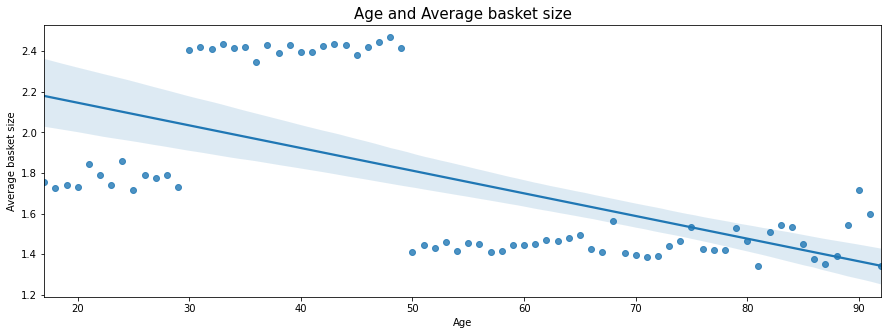

In [55]:
# visualisation des données
# visualizing data

plt.figure(figsize=(15,5))
plt.bar(basket['age'], basket['avg_basket_size'])

plt.title('Age and Average basket size', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Average basket size')

plt.savefig(
    fname='age_vs_avgbasket_distribution_1.jpg', dpi=100, format='jpg',
    orientation='landscape', bbox_inches='tight')
plt.show();

plt.figure(figsize=(15,5))
sns.regplot(x=basket['age'], y=basket['avg_basket_size'])

plt.title('Age and Average basket size', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Average basket size')

plt.savefig(
    fname='age_vs_avgbasket_distribution_2.jpg', dpi=100, format='jpg',
    orientation='landscape', bbox_inches='tight')
plt.show();

Both variables are quantitative, using Pearson correlation.

In [56]:
# r value, Pearson linear correlation. OC course method 

print('Coefficient of linear correlation is: ' + str(st.pearsonr(basket['age'], basket['avg_basket_size'])[0]))
print('R squared is: ' + str(st.pearsonr(basket['age'], basket['avg_basket_size'])[0]**2))
print('p-value is: ' + str(st.pearsonr(basket['age'], basket['avg_basket_size'])[1]))

Coefficient of linear correlation is: -0.5945228620310371
R squared is: 0.3534574334775756
p-value is: 1.4923805316935237e-08


In [57]:
# r value, Pearson linear correlation. Using scipy.stats

data4 = [basket.age.values, basket.avg_basket_size.values]

slope, intercept, r_value, p_value, std_err = st.linregress(data4)
print('r squared value is: ' + str(r_value**2))
print('r value is: ' + str(r_value))

r squared value is: 0.35345743347757613
r value is: -0.5945228620310375


#### Conclusions âge vs panier moyen :
Le coefficient de corrélation de Pearsons de -0.59 montre une **corrélation négative moyenne**. Plus l'âge augmente, plus le nombre moyen d'articles dans le panier d'achat diminue et vice versa.\
La visualisation nous montre la distribution des dépenses dans chaque groupe d'âge, ainsi que 3 groupes distincts (18-29 ans, 30-49 ans et 50-95 ans) en termes de nombre moyen d'articles achetés. 
Une autre visualisation avec la ligne de régression confirme la valeur r (corrélation négative moyenne), et nous montre qu'il y a plus de variance avec les jeunes clients et beaucoup moins avec les plus âgés.

Conclusions:\
Pearsons correlation coefficient of -0.59 shows **medium negative correlation**. As age increases, average number of items in the shopping basket decreases and vice versa.\
Visualization shows us distribution of spending in each age group, as well as 3 distinct clusters (ages 18-29, 30-49 and 50-95) in terms of average number of items purchased. 
Another visualization with regression line confirms r value (medium negative correlation), plus shows us there is more variance with younger customers and much less with older ones.

In [58]:
# age et catégorie de produit
# age vs prod_category

age_prod2 = df_global[['categ', 'birth']].copy()
age_prod2['age'] = 2022 - age_prod2['birth']

age_prod2.dropna(inplace=True)
age_prod2.drop(columns=['birth'], inplace=True)

age_prod2

,categ,age
0,0.0,49.0
1,0.0,49.0
2,0.0,49.0
3,0.0,49.0
4,1.0,49.0
...,...,...
336833,0.0,62.0
336834,2.0,27.0
336835,1.0,25.0
336836,2.0,25.0


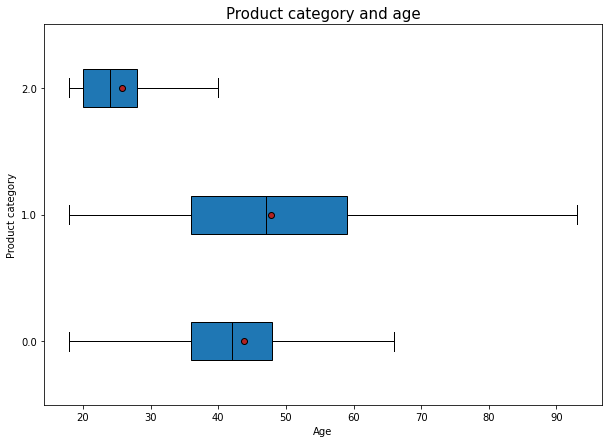

In [59]:
# visualisation des données
# visualizing data

X = "categ" # qualitative
Y = "age" # quantitative

modalites = age_prod2[X].unique()
groupes = []
for m in modalites:
    groupes.append(age_prod2[age_prod2[X]==m][Y])

# Propriétés graphiques 
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.figure(figsize=(10,7))

plt.boxplot(groupes,
            labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title('Product category and age', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Product category')

plt.savefig(
    fname='age_vs_prod_category1.jpg', dpi=100, format='jpg',
    orientation='landscape', bbox_inches='tight')

plt.show();

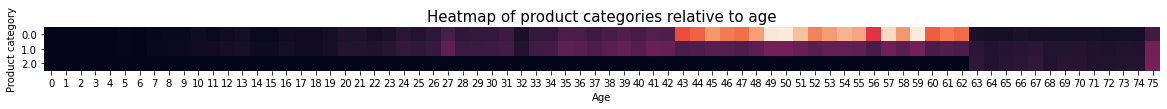

In [60]:
age_prod = pd.crosstab(df_global.birth, df_global.categ,
                       rownames=['DOB'], colnames=['product_category']).reset_index()

age_prod['age'] = 2021 - age_prod['DOB']
age_prod.drop(['DOB'], axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap(age_prod.iloc[:,:-1].transpose(),
            annot=False, square=True, cbar=False)

plt.title('Heatmap of product categories relative to age', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Product category')

plt.savefig(fname='age_vs_prod_category2.jpg', dpi=100, format='jpg',
            orientation='landscape', bbox_inches='tight')
plt.show();

Category is qualitative variable, age is quantitative. We apply eta squared here.

In [61]:
# eta squared. OC method

X = "categ" # qualitative
Y = "montant" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(age_prod2['categ'], age_prod2['age'])

0.11281696159849361

#### Conclusions age et catégorie de produit :
Une valeur de 0.11 pour l'eta au carré signifie que l'âge a un effet de taille moyenne sur la catégorie de produits achetés.
En d'autres termes, l'âge du client affecte la catégorie de produits qu'il achète (sur la base des valeurs de https://www.statology.org/eta-squared/).

Conclusions :

A value of 0.11 for eta squared means there is medium effect size of age on product category purchased.
In other words, age of customer affects what product category will be purchased (based on the values from https://www.statology.org/eta-squared/)

### Conclusions générales après l'analyse effectuée :

Notre librairie "Rester livres" affiche une bonne croissance de ses revenus.
Parmi nos clients, nous pouvons distinguer 3 groupes principaux. Les personnes âgées de
- 18-29
- 30-55
- plus de 56 ans

La répartition des produits nous montre que les différentes catégories sont populaires parmi les différents âges. La catégorie 2 est populaire auprès des jeunes clients, la catégorie 0 auprès des personnes d'âge moyen et la catégorie 1 auprès de tous les groupes d'âge.
En moyenne, les clients âgés de 30 à 50 ans achètent plus d'articles par commande, suivis par les clients plus jeunes et les plus âgés qui achètent le moins. Cependant, les données montrent également une variance, suggérant que les clients plus âgés achètent parfois plus de livres, ce qui peut être lié à des cadeaux.

Nous avons trouvé 2 anomalies dans les données. Une baisse des ventes en octobre 2021, et un produit qui a été acheté plusieurs fois, mais sans aucune donnée de prix.
L'enquête sur octobre 2021 nous a montré une baisse significative des ventes globales, qui s'est naturellement traduite par une baisse des revenus. On peut supposer que cela peut être lié à la période des fêtes et à la période "calme" avant les grands achats.
La recherche d'un article inconnu a donné l'identifiant 0_2245, qui a été acheté 103 fois au cours de l'année.

L'analyse statistique a montré que le montant dépensé, la fréquence des achats, le panier moyen, la catégorie du produit et l'âge sont corrélés entre eux. Sur la base de ces informations, nous pouvons planifier les nouvelles versions, les promotions et les campagnes publicitaires.


General conclusions after performed analysis:

Our bookshop "Rester livres" shows good revenue growth.
Among our customers we can distinctly see 3 main clusters. People aged:
- 18-29
- 30-55
- older than 56

Product breakdown shows us that various categories are popular among various ages. With prod_cat 2 being popular with younger customers, prod_cat 0 popular among middle ages and prod_cat 1 being universally purchased among all ages.
On average customers aged 30-50 are buying more items per order, followed by younger customers and older ones buying the least. However data also shows us variance, suggesting that older customers sometimes buy more books, which can be connected to gifting.

We found 2 anomalies in the data. A drop in sales in October 2021, and a product that was purchased many times, but without any pricing data.
Investigation about October 2021 showed us significant drop of overall sales, which naturally translated in lower revenue. As an assumption, this can be connected to holiday season and "quiet" period before big shopping.
Looking into unknown item yielded id 0_2245, which was purchased 103 times over the year.

Statistical analysis showed that the amount spent, frequency of purchases, average basket size, category of the product and age are correlated between each other. Based on this information we can plan new releases, promotions and ad campaigns.

# README

Nettoyage, exploration et analyse des données

Étape 1

Importez les bibliothèques python nécessaires.
Définir le répertoire de travail comme un dossier contenant les données brutes.
Charger les données brutes dans des cadres de données Pandas.
Explorer les données brutes pour mieux les comprendre.
Effectuer le nettoyage si nécessaire.

Étape 2

Fusionnez toutes les données brutes en un seul cadre de données.
Visualisez les statistiques pertinentes pour notre cas:\
	- données démographiques sur l'âge (moyenne, mode, distribution et valeurs aberrantes)\
	- répartition par sexe\
	- séries chronologiques des ventes\
	- mesures de tendance centrale et de dispersion pour nos produits\
	- mesure de la concentration via l'indice de Gini et la courbe de Lorenz.

Étape 3

Calculer et visualiser les différents types de corrélations dans nos données.

----------

Data cleaning, exploration and analysis

Step 1

Import necessary python libraries.
Set working directory as a folder with raw data.
Load raw data into Pandas dataframes.
Explore raw data to gain better understanding about it.
Perform cleaning where necessary.

Step 2

Merge all raw data into single dataframe.
Visualize statistics relevant to our case:\
	- age demographics (mean, mode, distribution and outliers)\
	- gender distribution\
	- time series of sales\
	- measures of central tendency and dispersion for our products\
	- measure of concentration via Gini index and Lorenz curve

Step 3

Calculate and visualize various types of correlations in our data.